<a href="https://colab.research.google.com/github/felipealissons/estudo_barcelona_airbnb/blob/main/%5BPJT_01%5D_Analisando_os_Dados_de_Barcelona_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>






# Análise dos Dados do Airbnb - *Barcelona*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.


<br>
<br>


No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

<br>
<br>

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>



Neste *notebook*, iremos analisar os dados  da cidade que é considerada uma das cidades mais lindas e pulsantes da Espanha.

Com seu skyline marcado pela tresloucada Sagrada Família, a capital da Catalunha tem um jeitão muito único, graças à ousadia do genial Antoni Gaudí, entre outros arquitetos que levaram o modernismo às últimas consequências. Mas não é a somente a originalidade de seus edifícios que explica o poder de sedução da terra do pintor Joan Miró e do chef Ferran Adrià. 

Com 1,6 milhões de habitantes e mais de dois mil anos de história, a metrópole cultiva a criatividade como uma questão de princípios. 

Não é à toa, portanto, que dita tendência nas artes, no design e na gastronomia, com a mesma intensidade que exercita a sua veia boêmia e a devoção pelo time, que por sinal é um dos maiores do mundo.



<br>



# Seja bem vindo a Barcelona


<center><img alt="Igreja sagrada família" width="100%" src="https://weintercambio.com.br/wp-content/uploads/2018/08/Barcelona-2.jpg"></center>









## Obtenção dos Dados


In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# importar o arquivo Barcelona.csv para um DataFrame
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/PJT 01 - Airbnb/Barcelona.csv")

## Análise dos Dados


**Dicionário das variáveis**

* `id` - Número de id gerado para identificar o imóvel
* `name` - Nome da propriedade anunciada 
* `host_id` - Número de id do anfitrião da propriedade. O Airbnb usa essa expressão para tratar dos proprietários
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - Esta coluna não apresenta valor
* `neighbourhood` - Nome do bairro
* `latitude` - Coordenada da latitude do imóvel
* `longitude` - Coordenada de longitude do imóvel
* `room_type` - Tipo de quarto / acomodação
* `price` - Preço pago pela estadia
* `minimum_nights` - Quantidade mínima de noites para reservar
* `number_of_reviews` - Número de avaliações que a propriedade possui
* `last_review` - Data da última avaliação
* `reviews_per_month` - Quantidade de avaliações por mês
* `calculated_host_listings_count` - Quantidade de imóveis do mesmo anfitrião
* `availability_365` - Número de dias de disponibilidade dentro de 365 dias
* `number_of_reviews_ltm`- Número de avaliações nos últimos doze meses
* `license` - Esta coluna não apresenta valor

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,673276379194656210,Habitación muy acogedora.,51421682,Maria Das Merces,Sants-Montjuïc,la Bordeta,41.363004,2.125326,Private room,59,1,9,2022-09-08,9.00,1,351,9,Exempt
1,44192271,Cozy terrace apartment\nApartamento con patio,200754964,Nuria,Les Corts,la Maternitat i Sant Ramon,41.372630,2.113180,Entire home/apt,110,3,54,2022-08-26,2.45,1,151,40,HUTB-013294
2,196021,"Large patio, 4 baths (3 en-suite), 19th c, cen...",953719,Julia,Eixample,l'Antiga Esquerra de l'Eixample,41.388420,2.161080,Entire home/apt,386,4,316,2022-08-12,2.37,1,238,45,HUTB-506707
3,196196,✨Large Apt near Sagrada Familia / Shared terrace✨,567180,Sandra,Eixample,la Sagrada Família,41.406600,2.174590,Entire home/apt,245,2,103,2022-08-10,0.77,19,22,11,HUTB-000325
4,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia And Maria,Eixample,la Sagrada Família,41.405560,2.172620,Entire home/apt,180,1,30,2022-08-29,0.27,38,60,9,HUTB-002062


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Os primeiros passos em uma análise exploratória de dados é entender o nosso *dataset*.

Fazemos isso entendendo:

<ol>
<li> O volume de dados que estamos analisando
<li> A quantidade de features ou colunas possui o nosso dataset
<li> Os tipos de dados de cada coluna
</ol>


In [ ]:
# Avaliando o volume de dados do DataFrame

display("Entradas: {} ".format(df.shape[0]))
display("Features: {}".format(df.shape[1]))

#Entendo os tipos de dados do nosso DataFrame
display(df.dtypes)

'Entradas: 16920 '

'Features: 18'

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [ ]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

license                           0.314894
reviews_per_month                 0.213593
last_review                       0.213593
name                              0.000591
host_name                         0.000118
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para analisar como os nossos dados estão se comportando irei plotar histogramas para entender as distribuições

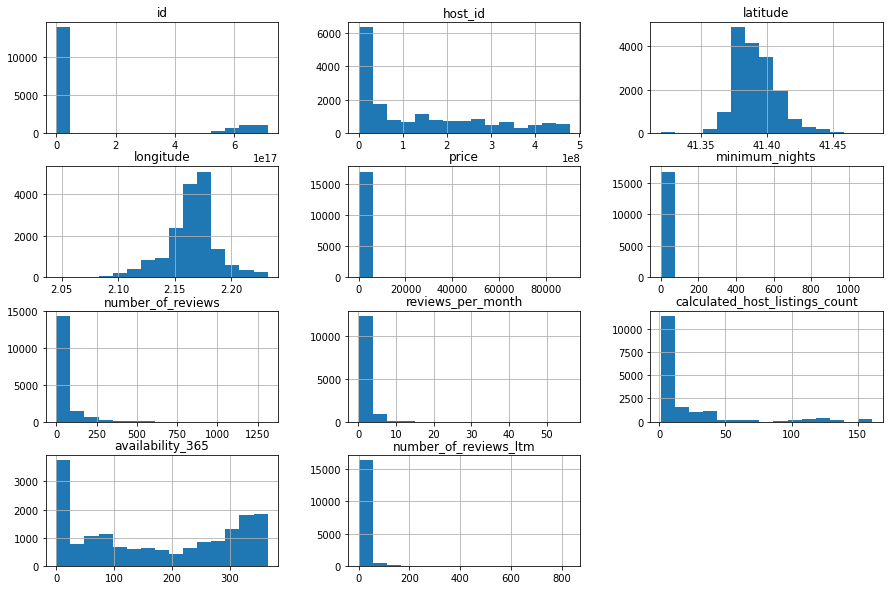

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Há *outliers* presentes?**

Olhando a distribuição do histograma é claro perceber a presença de outliers. Veja por exemplo as variáveis `price`,  `minimun_nights`, `calculated_host_listings_count`, `number_of_reviews_ltm`.

Os valores não seguem uma distribuição e estão distorcendo o gráfico.

Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [ ]:
# analisando o resumo estatístico das variáveis numéricas

df[['price','minimum_nights','calculated_host_listings_count','number_of_reviews','number_of_reviews_ltm','reviews_per_month','availability_365']].describe()

,price,minimum_nights,calculated_host_listings_count,number_of_reviews,number_of_reviews_ltm,reviews_per_month,availability_365
count,16920.000000,16920.000000,16920.000000,16920.000000,16920.000000,13306.000000,16920.000000
mean,172.914775,13.270449,19.506619,41.029137,11.112234,1.415639,170.815012
std,927.545812,30.233280,35.142606,77.338621,21.965633,1.790187,132.341829
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.010000,0.000000
25%,50.000000,1.000000,1.000000,1.000000,0.000000,0.250000,39.000000
50%,100.000000,3.000000,4.000000,7.000000,2.000000,0.890000,164.000000
75%,191.000000,31.000000,20.000000,44.000000,15.000000,2.030000,308.000000
max,90000.000000,1124.000000,161.000000,1311.000000,832.000000,56.130000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

A variável price possui 75% do valor abaixo de 191, porém seu valor máximo é 90000.
A quantidade mínima de noites (minimum_nights) está acima de 365 dias no ano.
Boxplot para minimum_nights

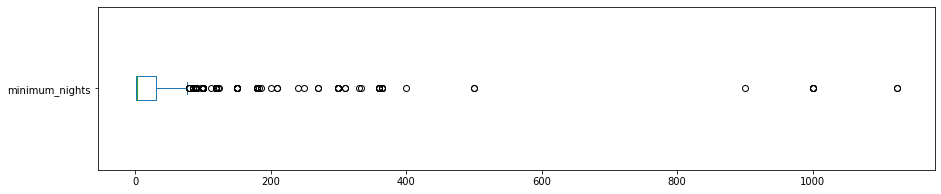

minimum_nights: valores cima de 90:
109 entradas
0.6442%


In [ ]:
# minimum_nights

df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# ver a quantidade de valores acima de 90 dias para minimum_nights

print("minimum_nights: valores cima de 90:")
print("{} entradas".format(len(df[df.minimum_nights > 90])))
print("{:.4f}%".format((len(df[df.minimum_nights >90]) / df.shape[0])*100))

#### Boxplot para price

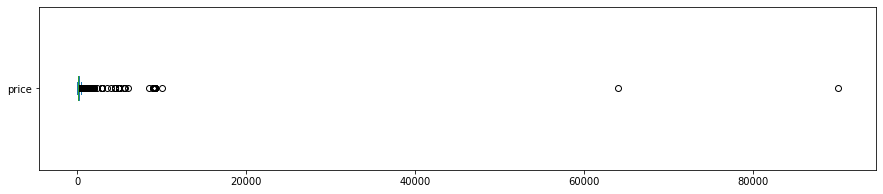

price: Valores acima de 1200:
153 entradas
0.90%


In [ ]:
# price

df.price.plot(kind='box',vert=False, figsize=(15,3))
plt.show()

#ver a quantidade de valores acima de 1200 para price
print("price: Valores acima de 1200:")
print("{} entradas".format(len(df[df.price >1200])))
print("{:.2f}%".format((len(df[df.price >1200])/ df.shape[0])*100))


#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

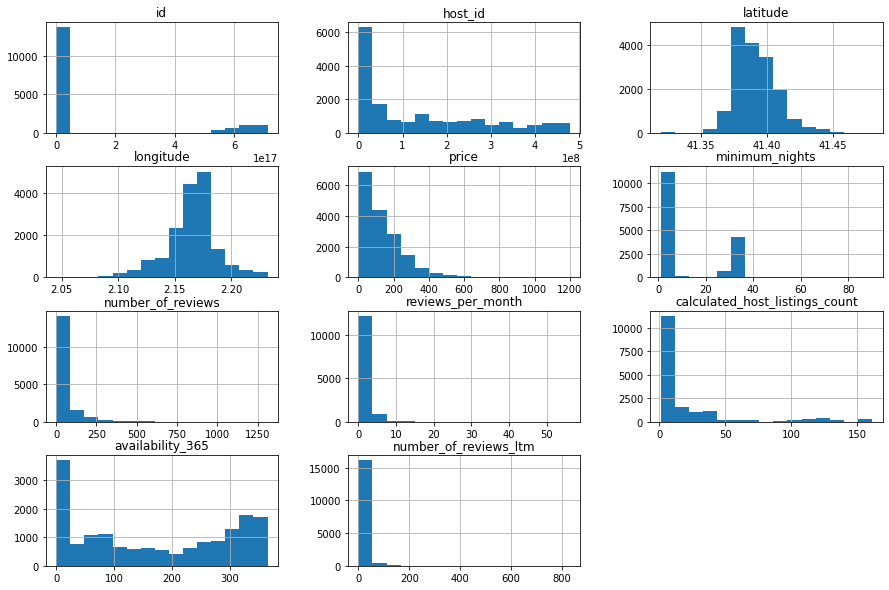

In [5]:
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1200].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 90].index, axis=0, inplace=True)

#remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

#plotar o histograma com as variáveis numéricas

df_clean.hist(bins=15, figsize=(15,10));

**Q4. Qual a média dos preços de aluguel?**

In [ ]:
# ver a média da coluna `price``
df_clean.price.mean()

138.38407058399855

### **Q5. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()
# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.304246,0.077681,0.046117,0.229474,0.242257
minimum_nights,-0.304246,1.000000,-0.179806,-0.216127,0.002504,0.055519
number_of_reviews,0.077681,-0.179806,1.000000,0.476385,-0.104678,0.053789
reviews_per_month,0.046117,-0.216127,0.476385,1.000000,-0.087677,0.140314
calculated_host_listings_count,0.229474,0.002504,-0.104678,-0.087677,1.000000,0.135623
availability_365,0.242257,0.055519,0.053789,0.140314,0.135623,1.000000


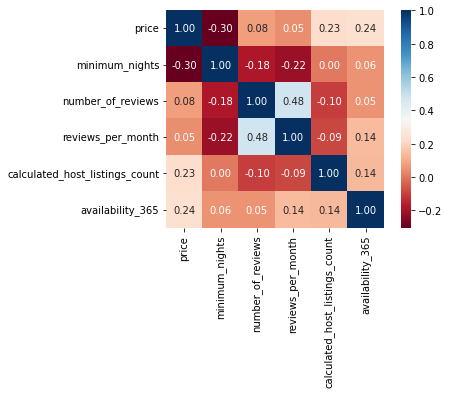

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot= True);

**Q6. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    9932
Private room       6383
Shared room         175
Hotel room          171
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.596123
Private room       0.383110
Shared room        0.010504
Hotel room         0.010263
Name: room_type, dtype: float64

Como podemos ver acima, aproximadamente 60% dos hospedes preferem alugar casa ou apartameno inteiro.

### **Q7. Qual a localidade mais cara do dataset?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [ ]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
la Vila Olímpica del Poblenou                   219.417808
Diagonal Mar i el Front Marítim del Poblenou    213.488550
la Dreta de l'Eixample                          209.572504
l'Antiga Esquerra de l'Eixample                 166.611834
Sant Antoni                                     159.132576
Sant Gervasi - Galvany                          152.277603
la Sagrada Família                              150.870253
el Fort Pienc                                   146.080899
Sant Genís dels Agudells                        144.428571
el Parc i la Llacuna del Poblenou               142.215116
Name: price, dtype: float64

Acima, vemos os bairros com a média de preço, como muitos não conhecem Barcelona pode simplesmente aceitar esses números sem um maior questionamento, mas é importante saber se a amostra em questão é representativa.

In [12]:
# entender qual tipo de locação predominante para o bairro la Vila Olímpica del Poblenou

df_clean.groupby(df_clean.neighbourhood=='la Vila Olímpica del Poblenou').room_type.value_counts() / df_clean.shape[0]

neighbourhood  room_type      
False          Entire home/apt    0.589460
               Private room       0.381190
               Shared room        0.010324
               Hotel room         0.010263
True           Entire home/apt    0.006662
               Private room       0.001921
               Shared room        0.000180
Name: room_type, dtype: float64

In [13]:
# entender qual tipo de locação predominante para o bairro la Vel Parc i la Llacuna del Poblenou
df_clean.groupby(df_clean.neighbourhood=='el Parc i la Llacuna del Poblenou').room_type.value_counts() / df_clean.shape[0]

neighbourhood  room_type      
False          Entire home/apt    0.590241
               Private room       0.379029
               Shared room        0.010324
               Hotel room         0.010083
True           Entire home/apt    0.005882
               Private room       0.004081
               Hotel room         0.000180
               Shared room        0.000180
Name: room_type, dtype: float64

Entender o tipo de locação predominante para cada bairro pode nos ajudar a entender a média de preço daquela região. 

Para aprofundar um pouco mais na investigação da média de preço em relação ao tipo de locação, abaixo será feito um `groupby()` relacionando o preço.

In [15]:
# ver o preço por tipo de locação
df_clean.groupby(['room_type']).price.mean().sort_values(ascending=False) [:10]


room_type
Hotel room         240.035088
Entire home/apt    178.498087
Private room        75.316936
Shared room         62.742857
Name: price, dtype: float64

A informação acima entrega um *insight* bastante interessante. Alugar um apartamento inteiro é em media mais barato do que alugar um hotel.

Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se x=longitude e y=latitude.

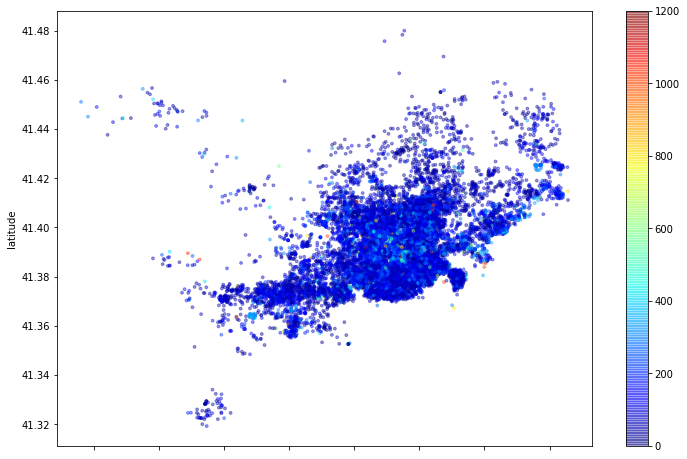

In [ ]:
# plotar os imóveis pela latitude-longitude

df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_clean['price'],s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q8. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``
df_clean.minimum_nights.mean()

11.8105155752956

## Conclusões


Foi feita uma análise exploratória superficial dos dados do Airbnb para entender e, se possível, tirar insights para uma futura viagem para Barcelona.

Nesse contexto, pudemos observar que existem outliers em algumas variáveis.

Também percebemos que não foi possível tirar conclusões com base na correlação das variáveis.

<br>

O que conseguimos tirar de *insights* é que a média do mínimo de noites são de aproximadamente 12 dias, e que o preço médio varia de 142.22 em *el Parc i la Llacuna del Poblenou* e 219.42 em *la Vila Olímpica del Poblenou*.

<br>

Com base nessa informação, mais uma pesquisa sobre ambos, entendemos que se você quer passeios pela marina, ou passeios pela praia e não se importa em pagar a mais por isso, a *la Vila Olímpica del Poblenou* é o lugar ideal para você.

Contudo, se prefere passeios turísticos mais urbanos, como museus e um passeio pela cidade, e quer uma economia e praticidade, *el Parc i la Llacuna del Poblenou* é o que você procura.

<br>

Também pudemos perceber ao analisar a média de preço por tipo de locação que, em média, é mais barato alugar um apartamento inteiro, do que se hospedar em um hotel. 

Essa informação é valiosa para nos ajudar na tomada de decisão do tipo de locação escolher dadas as nossas prioridades.

<br>

Para finalizar, é importante reforçar que esta análise é uma análise inicial, e que não temos todo o conjunto de dados e ferramental estatísticos. 

Poderíamos investigar o perfil predominante dos hospedes em cada região, por exemplo:

<br>

* É possível determinar que na área da marina a predominância é de pessoas mais maduras, casais que preferem uma fuga do estresse urbano, e no centro da cidade a predominância seja de jovens procurando o agito da cidade?

* Qual o perfil das pessoas que preferem alugar um apartamento inteiro, e apartamentos e quartos compartilhados?

Essas são perguntas que podem nos dar valiosos *insights* na pesquisa da nossa próxima viagem.

<br>

Mas como se pode notar, algo simples já nos da grande direção para problemas que temos no nosso dia a dia.

Como uma bela viagem a Barcelona.

Eu já estou com vontade de pegar as malas, e você?
